## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [21]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [22]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [23]:
num_rows = df.shape[0]
num_rows

294478

c. The number of unique users in the dataset.

In [24]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [25]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [26]:
#df.query('landing_page == "new_page" and group != "treatment"').group.count()
(((df['landing_page'] == "new_page") == (df['group'] == "treatment")) == False).sum()

3893

f. Do any of the rows have missing values?

In [27]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [28]:
df.landing_page.unique()

array(['old_page', 'new_page'], dtype=object)

In [29]:
#df2 = df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False])
criteria_1 = df[((df['landing_page'] == 'new_page') == (df['group'] == 'treatment')) == False].index

df2 = df.drop(criteria_1)
    #df2 = df2.drop(criteria_2)
    #df2 = df2.drop(indices_drop2)
    #df2 = df.drop((df.landing_page == 'new_page') and (df.group != "treatment"))
df.head(25)
df2 = pd.DataFrame(df2)
df2.reset_index(drop = True)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [30]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [31]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [32]:
df2.loc[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [33]:
repeat = df2.loc[df2.user_id.duplicated()]
print(repeat.index), df2.shape

Int64Index([2893], dtype='int64')


(None, (290585, 5))

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [34]:
df2 = df2.drop(repeat.index)
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [35]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [36]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [37]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [38]:
df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

$$H_{0} = p_{old} - p_{new} = 0$$
$$H_{1} = p_{old} - p_{new} \neq 0$$

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [57]:
p_new_conv = df2.query('group == "treatment" and landing_page == "new_page"').shape[0] / df2.shape[0]

p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [56]:
p_old_conv = df2.query('group == "control" and landing_page == "old_page"').shape[0] / df2.shape[0]

p_old = df2['converted'].mean()
p_old


0.11959708724499628

c. What is $n_{new}$?

In [41]:
n_new = df2.query('group == "treatment" and landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [42]:
n_old = df2.query('group == "control" and landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [43]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[p_new_conv, 1 - p_new_conv])
new_page_converted

array([0, 1, 0, ..., 1, 0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [44]:
old_page_converted = np.random.choice([0, 1], size = n_old, p = [p_old_conv, 1 - p_old_conv])
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [45]:
new_page_converted.mean() - old_page_converted.mean()

0.0010121402138170699

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [46]:
new_conv_sim = np.random.binomial(n_new, p_new, 10000) / n_new
old_conv_sim = np.random.binomial(n_old, p_old, 10000) / n_old

p_diffs = (new_conv_sim - old_conv_sim)

In [48]:
#p_diffs = np.array(p_diffs)
p_diffs

array([ 0.00010123, -0.00124814,  0.00122272, ..., -0.0011309 ,
        0.00244806, -0.0002634 ])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

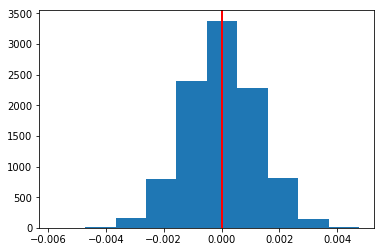

In [59]:
plt.hist(p_diffs);
plt.axvline(x = 0, color = 'r', linewidth = 2);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [64]:
old_p = df2.query('group == "control"').converted.mean()
new_p = df2.query('group == "treatment"').converted.mean()
(p_diffs > new_p - old_p).mean()

0.9053

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value that was calculated in part j is the p-value.  The p_value is the probability that something is outside of the expected range due to chance.  In statistical analysis, the p-value is compared to the type 1 error threshold $\alpha$.  The error threshold is set at 0.05 which assumes a 5% probability that there is a type 1 error when actually there is not.  If the p-value is greater than 0.05, the chance of being wrong is greater than 5 percent, which is too high of a probability to be reliable.  
Because the p-value is 0.4971, almost 10 times greater than the $\alpha$ value of 0.05, we fail to reject the null hypothesis and assume that the new webpage did not perform better than the old webpage.



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [138]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('group == "treatment" and landing_page == "new_page" and converted == 1').shape[0]
n_old = df2.query('group == "control" and landing_page == "old_page"').shape[0]
n_new = df2.query('group == "treatment" and landing_page == "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [146]:
#stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], value = None, alternative = 'two-sided', prop_var = False)
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
z_score, p_value


(1.3109241984234394, 0.18988337448195103)

In [148]:
from scipy.stats import norm

norm.cdf(z_score), norm.ppf(1-(0.05/2))

(0.9050583127590245, 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

There is not a significant difference between the old and new pages.  The p-value is too high to be stastically significant (p value = 0.18988) and the z score is lower than the critical value (1.311 < 1.9599), indicating that the new webpage did not perform better than the old webpage.  This result is in line with the results from parts j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

There are only two possible outcomes, so this hypothesis should be tested using logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [155]:
df2['intercept'] = 1

df2[['bb_page', 'ab_page']] = pd.get_dummies(df2['group'])

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,bb_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [158]:
import statsmodels.api as sm

log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [159]:
results = log_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Oct 2018   Pseudo R-squ.:               8.077e-06
Time:                        20:19:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with ab_page is 0.190.  This p-value is larger than the 0.05 assumed alpha value and which means that we fail to reject the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is almost always a good idea to include multiple variables in the regression model.  There are many factors in any decision that go into a simple two outcome problem.  This allows all the factors to be considered when deciding wether or not the ideal outcome is going to happen.  The disadvantage to additional terms in a logistic regression model include that the results could be skewed by the extra variables and throw off the results for the variables that are important to the decision.  

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [160]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [161]:
### Create the necessary dummy variables
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,bb_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0


In [165]:
df_new.country.unique()
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,bb_page,UK,US,CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [166]:
### Fit Your Linear Model And Obtain the Results
linear_mod = sm.OLS(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'CA']])
results = linear_mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Mon, 15 Oct 2018   Prob (F-statistic):              0.178
Time:                        21:00:02   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1203      0.001    128.267      0.000       0.118       0.122
ab_page       -0.0016      0.001     -1.307      0.191      -0.004       0.001
UK             0.0010      0.001      0.744      0.457      -0.002       0.004
CA            -0.0042      0.003     -1.514      0.130      -0.010       0.001
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         5.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using a linear model, there are no significant varibles that affect the outcome.  The p values for the new page, UK, and Canada columns (0.191, 0.457, 0.130 respectively) are all smaller than the alpha value of 0.05, meaning that we fail to reject the null hypothesis when the country of origin data is included.